In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Assignment_5"

/content/drive/My Drive/Colab Notebooks/Assignment_5


In [77]:
dataset=pd.read_csv("Country-data.csv")
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [79]:
dataset.shape

(167, 10)

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


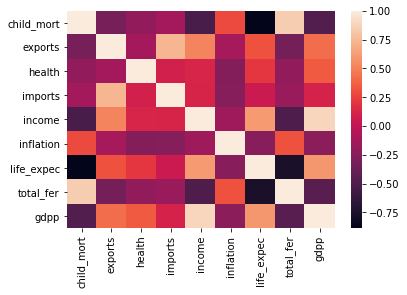

In [82]:
#Look at the correlation of all the variables
cor = dataset.corr()
sns.heatmap(cor)

In [83]:
#From above we can say Import and Export are highly correlated
X=dataset.iloc[:,[2,4]].values

In [86]:
X.shape

(167, 2)

In [87]:
import scipy.cluster.hierarchy as sch

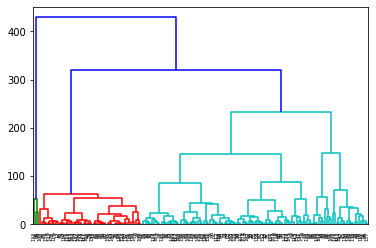

In [88]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward')) #Low Variance

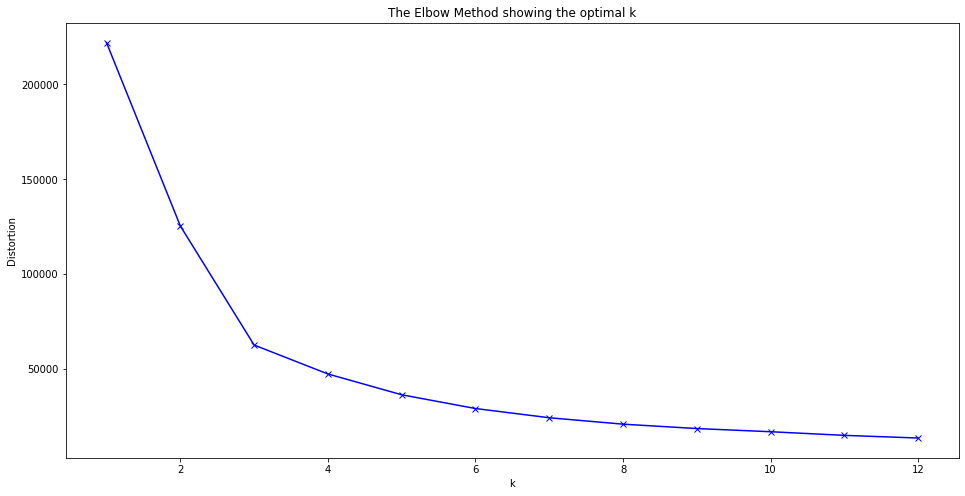

In [91]:
from sklearn.cluster import KMeans
#Elbow Method to find k
distortions = []
K = range(1,13)
for i in K:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(X)
    distortions.append(model_demo.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
k=3

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [103]:
hc=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')

In [104]:
y=hc.fit_predict(X)

In [105]:
y

array([2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0])

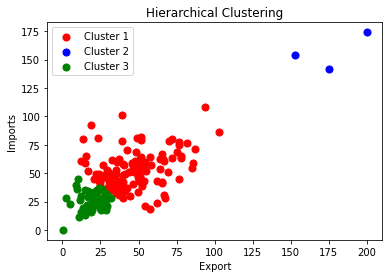

In [106]:
#Visualize the cluster
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='green',label='Cluster 3')
plt.title('Hierarchical Clustering')
plt.xlabel('Export')
plt.ylabel('Imports')
plt.legend()

**Part-2**

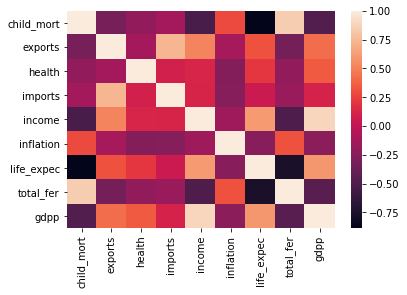

In [107]:
#Look at the correlation of all the variables
cor = dataset.corr()
sns.heatmap(cor)

In [108]:
#From above we can say income and gdpp are highly correlated
X=dataset.iloc[:,[5,9]].values

In [111]:
X.shape

(167, 2)

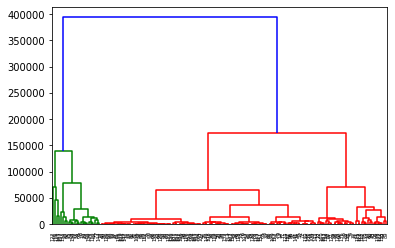

In [112]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward')) #Low Variance

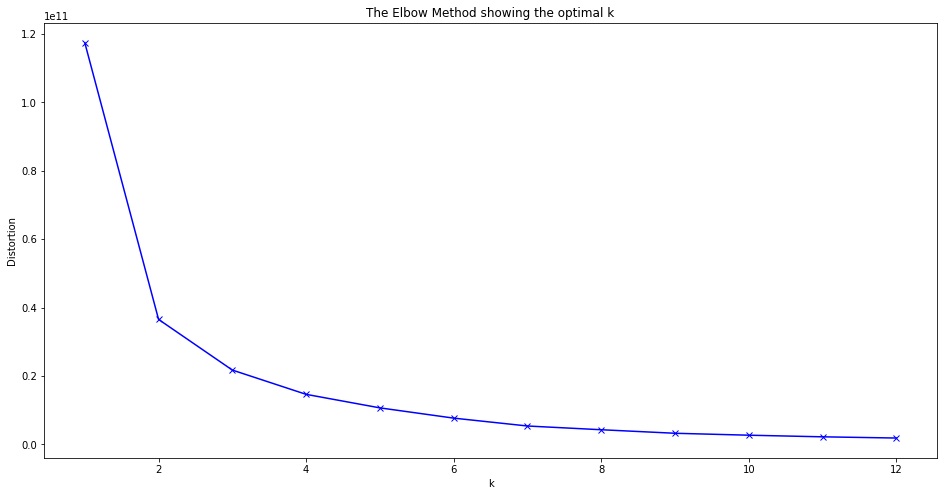

In [113]:
from sklearn.cluster import KMeans
#Elbow Method to find k
distortions = []
K = range(1,13)
for i in K:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(X)
    distortions.append(model_demo.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [115]:
k=2
hc=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')

In [116]:
y=hc.fit_predict(X)
y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

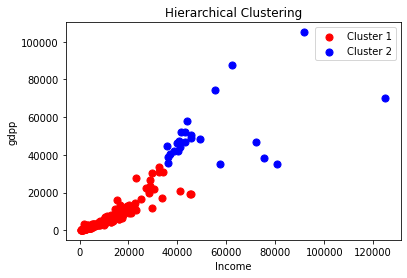

In [117]:
#Visualize the cluster
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='blue',label='Cluster 2')
plt.title('Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('gdpp')
plt.legend()